<a href="https://colab.research.google.com/github/Soumi7/PG-StockManagement/blob/master/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pycaret

     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 133kB 8.4MB/s 
     |████████████████████████████████| 1.2MB 8.6MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 7.0MB 15.7MB/s 
     |████████████████████████████████| 1.6MB 46.7MB/s 
     |████████████████████████████████| 389kB 43.4MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
     |████████████████████████████████| 1.2MB 50.7MB/s 
     |████████████████████████████████| 266kB 53.3MB/s 
     |████████████████████████████████| 63.9MB 60kB/s 
     |████████████████████████████████| 614kB 44.5MB/s 
     |████████████████████████████████| 6.2MB 50.6MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 235kB 54.5MB/s 
     |████████████████████████████████| 552kB 27.1MB/s 
   

In [5]:
import pandas as pd
from pycaret.utils import enable_colab 
enable_colab()

Colab mode activated.


In [6]:
df_master= pd.read_csv("/content/drive/My Drive/final.csv")

In [35]:
hol = pd.read_csv('https://raw.githubusercontent.com/Soumi7/PG-StockManagement/master/holidays.csv?token=AMHKCTYQQN3G72SX4DPF6226XPAUK')
# hol
# type(hol["date"])

def encoding(data):
    holi_num=[]
    for holi in data["isholiday"]:
        if holi =="yes":
            holi_num.append(1)
            # print('y')
        else:
            holi_num.append(0)
            # print('no')
    return holi_num       

hol["isholnum"]=encoding(hol)        
hol=hol.drop("isholiday",axis=1)



(hol)

,date,isholnum
0,2018-01-01,1
1,2018-01-02,0
2,2018-01-03,0
3,2018-01-04,0
4,2018-01-05,0
5,2018-01-06,1
6,2018-01-07,1
7,2018-01-08,0
8,2018-01-09,0
9,2018-01-10,0


In [36]:
df_merge2=pd.merge(hol,df,how="left",on="date")

In [38]:
df_merge2.to_csv("final2.csv")


In [7]:
df_master.head()

,Unnamed: 0,date,sku,group,name,quantity,unit_cogs,agg_cogs,unit_revenue,gross_margin,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
0,0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,"1,77",1.77,2.57,31.13,08:52 AM,04:31 PM,6,79,89,8,5.5
1,1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,"3,2",3.20,5.68,43.66,08:52 AM,04:31 PM,6,79,89,8,5.5
2,2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,"2,68",10.72,3.80,29.47,08:52 AM,04:31 PM,6,79,89,8,5.5
3,3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,"2,68",10.72,3.80,29.47,08:52 AM,04:31 PM,6,79,89,8,5.5
4,4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,"2,68",10.72,2.85,5.96,08:52 AM,04:31 PM,6,79,89,8,5.5


In [8]:
df= df_master

In [39]:
df=df.drop(df.columns[0],axis=1)

In [40]:
df["unit_cogs"]=df["agg_cogs"]/df["quantity"]

KeyError: ignored

In [11]:
df["quantity"]=df["quantity"].apply(pd.to_numeric)

In [44]:
df

,sku,group,name,quantity,unit_cogs,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
0,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,1.77,08:52 AM,04:31 PM,6,79,89,8,5.5
1,5986,CHEMISTRY,ACE 1 L,1.0,3.20,08:52 AM,04:31 PM,6,79,89,8,5.5
2,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
3,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
4,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...
23175,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,1.85,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23176,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,4.51,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23177,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,1.83,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23178,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,1.31,08:47 AM,04:46 PM,-3,21,72,-2,-3.0


In [48]:
df_merge2.corr()

,isholnum,sku,quantity,unit_cogs,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
isholnum,1.000000,-0.001159,0.003883,-0.006207,0.459041,0.256512,0.377513,0.493961,0.406016
sku,-0.001159,1.000000,-0.035209,0.016694,-0.019463,-0.023873,-0.023975,-0.016995,-0.018710
quantity,0.003883,-0.035209,1.000000,-0.045005,-0.004060,-0.006670,-0.006593,-0.003053,-0.004754
unit_cogs,-0.006207,0.016694,-0.045005,1.000000,-0.003527,0.003100,0.008191,-0.004402,-0.003041
HeatIndexC,0.459041,-0.019463,-0.004060,-0.003527,1.000000,0.872311,0.706795,0.990233,0.991941
cloudcover,0.256512,-0.023873,-0.006670,0.003100,0.872311,1.000000,0.741880,0.841281,0.881697
humidity,0.377513,-0.023975,-0.006593,0.008191,0.706795,0.741880,1.000000,0.639841,0.671473
tempC,0.493961,-0.016995,-0.003053,-0.004402,0.990233,0.841281,0.639841,1.000000,0.988872
Avgtemp,0.406016,-0.018710,-0.004754,-0.003041,0.991941,0.881697,0.671473,0.988872,1.000000


In [15]:
df=df.drop(["agg_cogs","unit_revenue","gross_margin",],axis=1)

In [16]:
df

,date,sku,group,name,quantity,unit_cogs,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,1.77,08:52 AM,04:31 PM,6,79,89,8,5.5
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,3.20,08:52 AM,04:31 PM,6,79,89,8,5.5
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-01-12,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,1.85,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23176,2018-01-12,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,4.51,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23177,2018-01-12,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,1.83,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23178,2018-01-12,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,1.31,08:47 AM,04:46 PM,-3,21,72,-2,-3.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_df=scaler.fit_transform(df.drop(["date","name","group","sunrise","sunset"],axis=1))
scaled_df



array([[-0.54784883, -0.18103599, -0.33352008, ...,  1.0681407 ,
         1.65174696,  1.51777512],
       [-0.42457284, -0.18103599, -0.06404657, ...,  1.0681407 ,
         1.65174696,  1.51777512],
       [-1.4389218 , -0.14475042, -0.16203694, ...,  1.0681407 ,
         1.65174696,  1.51777512],
       ...,
       [ 0.35393591, -0.1689408 , -0.3222135 , ..., -0.43747534,
        -1.70433229, -1.62909674],
       [-1.18910183, -0.1689408 , -0.42020386, ..., -0.43747534,
        -1.70433229, -1.62909674],
       [ 1.55256341, -0.18103599, -0.06404657, ..., -0.43747534,
        -1.70433229, -1.62909674]])

In [18]:
type(scaled_df)

numpy.ndarray

In [19]:
df

,date,sku,group,name,quantity,unit_cogs,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,1.77,08:52 AM,04:31 PM,6,79,89,8,5.5
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,3.20,08:52 AM,04:31 PM,6,79,89,8,5.5
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,2.68,08:52 AM,04:31 PM,6,79,89,8,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-01-12,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,1.85,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23176,2018-01-12,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,4.51,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23177,2018-01-12,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,1.83,08:47 AM,04:46 PM,-3,21,72,-2,-3.0
23178,2018-01-12,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,1.31,08:47 AM,04:46 PM,-3,21,72,-2,-3.0


In [20]:
df.describe(include=["O"])

,date,group,name,sunrise,sunset
count,23180,23180,23180,23180,23180
unique,12,36,5134,6,12
top,2018-01-08,SWEETS,SUROWKA KUBEK,08:52 AM,04:40 PM
freq,2144,2298,33,7375,2144


In [21]:
df.describe()

,sku,quantity,unit_cogs,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
count,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000,23180.000000
mean,8324.532916,15.967602,3.539872,1.489301,50.943097,76.939560,3.078343,1.400345
std,5508.085197,82.679277,5.306759,2.687022,29.573748,11.291303,2.979732,2.701153
min,2.000000,0.030000,0.010000,-3.000000,0.000000,52.000000,-2.000000,-3.000000
25%,3857.000000,2.000000,1.294926,-1.000000,21.000000,68.000000,0.000000,-1.000000
50%,7927.500000,4.000000,2.180000,1.000000,47.000000,75.000000,3.000000,0.500000
75%,11418.000000,11.000000,3.700000,4.000000,81.000000,88.000000,6.000000,4.000000
max,19952.000000,2735.000000,500.000000,6.000000,89.000000,89.000000,8.000000,5.500000


In [22]:
gb=df.groupby(["group"])
gb.first()

,date,sku,name,quantity,unit_cogs,sunrise,sunset,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
group,,,,,,,,,,,,
ART._HYGIENIC,2018-01-01,3646,BELLA HERBS 12 Z WERBENA,1.00,2.390000,08:52 AM,04:31 PM,6,79,89,8,5.5
ARTICLE_OF_HOUSEHOLD,2018-01-01,6703,BIBULA KOLOR,2.00,0.750000,08:52 AM,04:31 PM,6,79,89,8,5.5
BEER,2018-01-01,17506,PIWO BOJAN WIELKOP.0_5 L B/ZW,3.00,2.500000,08:52 AM,04:31 PM,6,79,89,8,5.5
BREAD,2018-01-01,14220,B BABKA DUZA JOGURTOWA/POLEWA,1.00,7.310000,08:52 AM,04:31 PM,6,79,89,8,5.5
CANNED_PATE,2018-01-01,496,BRZOSKWINIE SANDRA 820G,9.00,3.770000,08:52 AM,04:31 PM,6,79,89,8,5.5
CHEMISTRY,2018-01-01,5307,PATYCZKI BELLA 200,1.00,1.770000,08:52 AM,04:31 PM,6,79,89,8,5.5
CHEWING_GUM_LOLIPOPS,2018-01-01,4690,DROPS HALLS MENTOL LUPTUS,12.00,1.350000,08:52 AM,04:31 PM,6,79,89,8,5.5
CHIPS_FLAKES,2018-01-01,3441,CHETOS MINIONKI 80 G,4.00,2.120000,08:52 AM,04:31 PM,6,79,89,8,5.5
CIGARETTES,2018-01-01,1835,BLOK RYSUNKOWY KOLOR,1.00,1.220000,08:52 AM,04:31 PM,6,79,89,8,5.5


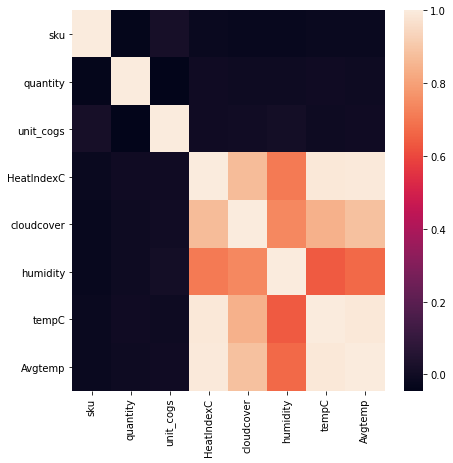

In [24]:
df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

(array([1853., 2144., 3909.,    0., 3819., 3667.,    0.,    0., 3930.,
        3858.]),
 array([-3.  , -2.15, -1.3 , -0.45,  0.4 ,  1.25,  2.1 ,  2.95,  3.8 ,
         4.65,  5.5 ]),
 <a list of 10 Patch objects>)

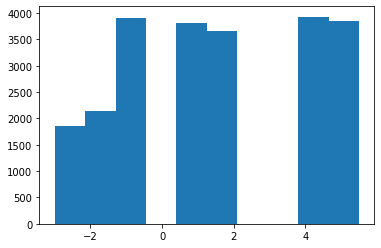

In [25]:
plt.hist(df["Avgtemp"])

In [26]:
df.corr()

,sku,quantity,unit_cogs,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
sku,1.000000,-0.035209,0.016694,-0.019463,-0.023873,-0.023975,-0.016995,-0.018710
quantity,-0.035209,1.000000,-0.045005,-0.004060,-0.006670,-0.006593,-0.003053,-0.004754
unit_cogs,0.016694,-0.045005,1.000000,-0.003527,0.003100,0.008191,-0.004402,-0.003041
HeatIndexC,-0.019463,-0.004060,-0.003527,1.000000,0.872311,0.706795,0.990233,0.991941
cloudcover,-0.023873,-0.006670,0.003100,0.872311,1.000000,0.741880,0.841281,0.881697
humidity,-0.023975,-0.006593,0.008191,0.706795,0.741880,1.000000,0.639841,0.671473
tempC,-0.016995,-0.003053,-0.004402,0.990233,0.841281,0.639841,1.000000,0.988872
Avgtemp,-0.018710,-0.004754,-0.003041,0.991941,0.881697,0.671473,0.988872,1.000000


In [49]:
gb.corr()

sku  quantity  \
group                                                                      
ART._HYGIENIC                             sku         1.000000 -0.355237   
                                          quantity   -0.355237  1.000000   
                                          unit_cogs   0.524652 -0.303172   
                                          HeatIndexC -0.050915 -0.078526   
                                          cloudcover -0.074276 -0.119255   
                                          humidity   -0.042473 -0.085554   
                                          tempC      -0.053321 -0.060111   
                                          Avgtemp    -0.061590 -0.086787   
ARTICLE_OF_HOUSEHOLD                      sku         1.000000  0.036103   
                                          quantity    0.036103  1.000000   
                                          unit_cogs  -0.668497 -0.335226   
                                          HeatIndexC -0.003657  0.131412   
                                          cloudcover -0.153836  0.259322   
                                          humidity   -0.175664  0.350455   
                                          tempC       0.034004  0.095567   
                                          Avgtemp     0.024616  0.133064   
BEER                                      sku         1.000000 -0.237147   
                                          quantity   -0.237147  1.000000   
                                          unit_cogs   0.215090 -0.210259   
                                          HeatIndexC -0.078223  0.009128   
                                          cloudcover -0.081220  0.004627   
                                          humidity   -0.082515  0.006691   
                                          tempC      -0.073144  0.009839   
                                          Avgtemp    -0.077353  0.007486   
BREAD                                     sku         1.000000 -0.017710   
                                          quantity   -0.017710  1.000000   
                                          unit_cogs   0.049243 -0.192420   
                                          HeatIndexC -0.036171 -0.018128   
                                          cloudcover -0.039334 -0.018867   
                                          humidity   -0.041192 -0.023655   
                                          tempC      -0.035914 -0.015790   
                                          Avgtemp    -0.035821 -0.017285   
CANNED_PATE                               sku         1.000000 -0.186139   
                                          quantity   -0.186139  1.000000   
                                          unit_cogs   0.184446  0.055540   
                                          HeatIndexC -0.025184  0.056364   
                                          cloudcover -0.030991  0.058528   
                                          humidity   -0.006946  0.035505   
                                          tempC      -0.020405  0.054354   
                                          Avgtemp    -0.025685  0.052670   
CHEMISTRY                                 sku         1.000000 -0.029020   
                                          quantity   -0.029020  1.000000   
                                          unit_cogs   0.022570 -0.230571   
                                          HeatIndexC -0.074068  0.001738   
                                          cloudcover -0.072361  0.002792   
                                          humidity   -0.081873  0.010110   
                                          tempC      -0.070161  0.000599   
                                          Avgtemp    -0.071892  0.000715   
CHEWING_GUM_LOLIPOPS                      sku         1.000000  0.074139   
                                          quantity    0.074139  1.000000   
                                          unit_cogs  -0.096773 -0.273224   
                               

In [27]:
from pycaret.regression import *
mod1=setup(data=df,target="quantity",numeric_features=["unit_cogs","HeatIndexC","cloudcover","humidity","tempC"],normalize=True,high_cardinality_features =["name"])
compare_models()

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:01:45
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
date,Date
sku,Numeric
group,Categorical
name,Categorical
quantity,Label
unit_cogs,Numeric
sunrise,Date
sunset,Date
HeatIndexC,Numeric
cloudcover,Numeric


KeyboardInterrupt: ignored

In [0]:
#model creation
rf=create_model('lightgbm')

In [42]:
df_merge2=df_merge2.drop(["sunrise","sunset"],axis=1)

In [43]:
df_merge2.

,date,isholnum,sku,group,name,quantity,unit_cogs,HeatIndexC,cloudcover,humidity,tempC,Avgtemp
0,2018-01-01,1,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,1.77,6,79,89,8,5.5
1,2018-01-01,1,5986,CHEMISTRY,ACE 1 L,1.0,3.20,6,79,89,8,5.5
2,2018-01-01,1,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,2.68,6,79,89,8,5.5
3,2018-01-01,1,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,2.68,6,79,89,8,5.5
4,2018-01-01,1,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,2.68,6,79,89,8,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-01-12,0,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,1.85,-3,21,72,-2,-3.0
23176,2018-01-12,0,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,4.51,-3,21,72,-2,-3.0
23177,2018-01-12,0,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,1.83,-3,21,72,-2,-3.0
23178,2018-01-12,0,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,1.31,-3,21,72,-2,-3.0


In [0]:
from 